<a href="https://colab.research.google.com/github/SamPetkov/PartialCoalescence/blob/main/BubbleRetained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

Constants + Time variables

In [ ]:
#Constants
sigma12 = 22e-3
rho_l = 786.
Mu_l = 0.00105
rho_g = 1.184
MU_g = 1.85e-5
D0 = 1.07e-3
Oh0 = Mu_l/np.sqrt(rho_l*sigma12*D0)
g = 9.81

Bo = (rho_l * g * D0**2 / sigma12)
TAU = np.sqrt((rho_l*D0**(3))/(sigma12))
U0 = D0/TAU
V0 = np.pi/6

# internal diameter, distance of center from top of droplet, burst top , in, down 1,0,-1
results_old = np.array([[0.20,0.10,1],[0.20,0.20,-1],[0.20,0.15,0],[0.20,0.125,1],[0.20,0.175,0],[0.05,0.125,0],[0.05,0.150,0],[0.05,0.325,-1],[0.05,0.350,-1],[0.10,0.10,0],[0.10,0.125,0],[0.10,0.225,-1],[0.10,0.250,-1],[0.05,0.10,0],[0.05,0.30,-1],[0.10,0.075,0],[0.10,0.20,0],[0.15,0.10,1],[0.15,0.125,0],[0.15,0.225,-1],[0.15,0.25,-1],[0.25,0.15,1],[0.25,0.175,0],[0.05,0.275,-1],[0.05,0.075,0],[0.10,0.075,0],[0.15,0.20,-1],[0.25,0.20,-1],[0.075,0.075,0],[0.125,0.10,0],[0.125,0.20,-1],[0.225,0.15,0],[0.05,0.05,1],[0.10,0.05,1],[0.075,0.05,1],[0.125,0.075,1],[0.225,0.125,1],[0.075,0.25,-1],[0.05,0.25,-1],[0.15,0.175,0],[0.125,0.175,0],[0.225,0.20,-1],[0.075,0.225,-1],[0.075,0.20,0],[0.175,0.20,-1],[0.175,0.175,0],[0.175,0.125,1],[0.175,0.150,0],[0.275,0.175,0],[0.275,0.20,-1],[0.225,0.175,0],[0.15,0.15,0],[0.125,0.125,0],[0.125,0.150,0],[0.10,0.15,0],[0.10,0.175,0],[0.05,0.175,0],[0.05,0.20,0],[0.075,0.10,0],[0.075,0.125,0],[0.075,0.15,0],[0.075,0.175,0],[0.275,0.15,1],[0.30,0.175,1],[0.30,0.20,-1],[0.05,0.225,0],[0.20,0.1375,0],[0.05,0.0625,0],[0.05,0.2375,0],[0.25,0.1625,0],[0.25,0.1875,-1],[0.20,0.1875,-1],[0.225,0.1875,-1],[0.075,0.0625,1],[0.075,0.2125,-1],[0.10,0.0625,1],[0.10,0.2125,-1],[0.125,0.0875,0],[0.125,0.1875,0],[0.15,0.1125,0],[0.15,0.1875,0],[0.175,0.1375,0],[0.225,0.1375,1],[0.275,0.1875,-1],[0.0875,0.0625,1],[0.0875,0.075,0],[0.0875,0.20,0],[0.0875,0.2125,-1],[0.0875,0.10,0],[0.0875,0.125,0],[0.0875,0.15,0],[0.0875,0.175,0],[0.1375,0.20,-1],[0.1375,0.1875,0],[0.1875,0.125,1],[0.1875,0.1375,0],[0.2125,0.175,0],[0.2125,0.1875,-1],[0.2625,0.175,0],[0.2625,0.1875,-1],[0.2375,0.175,0],[0.2375,0.1875,-1],[0.30,0.1875,-1],[0.175,0.1875,-1],[0.2875,0.175,0],[0.2875,0.1875,-1],[0.275,0.1625,1],[0.0625,0.0625,1],[0.0625,0.075,0],[0.0625,0.225,-1],[0.0625,0.2125,0],[0.0625,0.20,0],[0.0625,0.175,0],[0.0625,0.15,0],[0.0625,0.10,0],[0.1375,0.175,0],[0.1375,0.15,0],[0.1375,0.125,0],[0.1875,0.175,0],[0.1875,0.15,0],[0.1875,0.1875,-1],[0.1625,0.175,0],[0.1625,0.15,0],[0.2875,0.1625,1],[0.2625,0.1625,1],[0.2375,0.15,1],[0.2375,0.1625,0],[0.2125,0.1375,1],[0.1625,0.1125,1],[0.1375,0.0875,1],[0.1125,0.0625,1],[0.1125,0.075,0],[0.0625,0.125,0],[0.1125,0.10,0],[0.1125,0.125,0],[0.1125,0.15,0],[0.1125,0.175,0],[0.2125,0.15,0],[0.1625,0.125,0],[0.1625,0.1875,0],[0.1125,0.20,-1],[0.1125,0.075,0],[0.1375,0.10,1],[0.05,0.24375,-1],[0.0625,0.21875,0],[0.075,0.20625,0]])
# launchin 0.05 0.15 to do

In [ ]:
F = 4*sigma12/(0.25*D0)*np.pi*(0.25*D0)**2
maggat = 2/3 * np.pi * (0.25*D0)**3 * 786
print(F/(maggat*g))
print(Oh0)

239.24055711353157
0.0077192444958885924


phase diagram


In [ ]:
# prompt: make a 2d phase diagram: x axis is results[:,0,], y - results[:,1], phase - the third element in each array of the results np array and give different shapes and colors for eah value - 0,1,-1

import matplotlib.ticker as ticker

#Style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif', 'Times New Roman', 'Computer Modern Roman'] # Better font
plt.rcParams['mathtext.fontset'] = 'cm' # Use Computer Modern fonts for math
plt.rcParams['font.size'] = 10 # Adjust font size
plt.rcParams['axes.labelsize'] = 14  # Increased label size
plt.rcParams['axes.labelweight'] = 'bold' # Made labels bold
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

# Filter data for each phase
phase_0 = results[results[:, 2] == 0]
phase_1 = results[results[:, 2] >= 1]
phase_neg1 = results[results[:, 2] <= -1]

# Create the scatter plot
plt.figure(figsize=(8, 6))

# Plot data for each phase with different markers and colors
plt.scatter(phase_0[:, 0], phase_0[:, 1], c='blue', marker='o', label='Bubble in Secondary Droplet')
plt.scatter(phase_1[:, 0], phase_1[:, 1], c='red', marker='^', label='Top Burst')
plt.scatter(phase_neg1[:, 0], phase_neg1[:, 1], c='green', marker='s', label='Pool Escape')

# Add labels and title
plt.xlabel('$d_i$')
plt.ylabel('$\Delta h $')
plt.tick_params(which='major', length=7, direction='in')
plt.tick_params(which='minor', length=4, direction='in')
plt.legend()
plt.grid(False)
plt.xlim(0.025, 0.325)  # Set x-axis limits with padding
plt.ylim(0.025, 0.325)  # Set y-axis limits with padding
plt.show()

<>:33: SyntaxWarning: invalid escape sequence '\D'
<>:33: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipython-input-1453766566.py:33: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta h $')


NameError: name 'results' is not defined

more conditions + time diagram

<>:46: SyntaxWarning: invalid escape sequence '\D'
<>:46: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipython-input-524959351.py:46: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta h $')


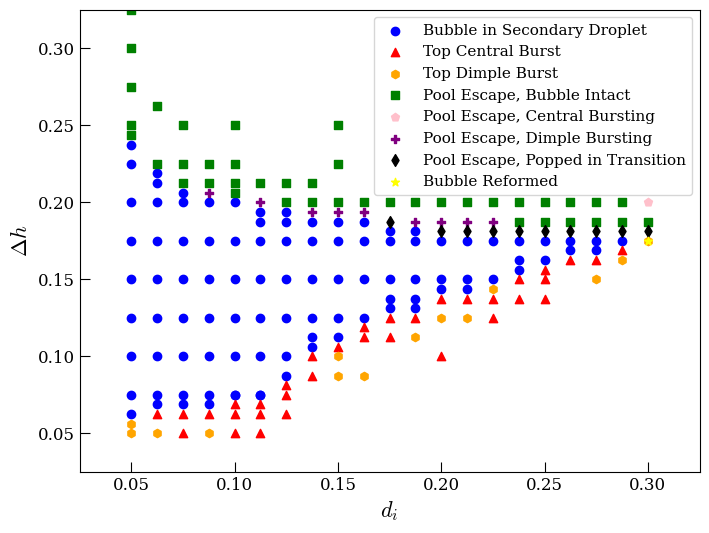

In [ ]:
# prompt: make a 2d phase diagram: x axis is results[:,0,], y - results[:,1], phase - the third element in each array of the results np array and give different shapes and colors for eah value - 0,1,-1


results = np.array([[0.20,0.10,1,0.550],[0.20,0.20,-1,0.550],[0.20,0.15,0,0.553],[0.20,0.125,2,0.553],[0.20,0.175,0,0.552],[0.05,0.125,0,0.552],[0.05,0.150,0,0.552],[0.05,0.325,-1,0.552],[0.05,0.350,-1,0.552],[0.10,0.10,0,0.552],[0.10,0.125,0,0.551],[0.10,0.225,-1,0.552],[0.10,0.250,-1,0.552],[0.05,0.10,0,0.552],[0.05,0.30,-1,0.552],[0.10,0.075,0,0.551],[0.10,0.20,0,0.552],[0.15,0.10,2,0.552],[0.15,0.125,0,0.552],[0.15,0.225,-1,0.551],[0.15,0.25,-1,0.550],[0.25,0.15,1,0.556],[0.25,0.175,0,0.554],[0.05,0.275,-1,0.551],[0.05,0.075,0,0.552],[0.10,0.075,0,0.551],[0.15,0.20,-1,0.553],[0.25,0.20,-1,0.548],[0.075,0.075,0,0.551],[0.125,0.10,0,0.550],[0.125,0.20,-1,0.554],[0.225,0.15,0,0.553],[0.05,0.05,2,0.552],[0.10,0.05,1,0.551],[0.075,0.05,1,0.551],[0.125,0.075,1,0.550],[0.225,0.125,1,0.552],[0.075,0.25,-1,0.551],[0.05,0.25,-1,0.552],[0.15,0.175,0,0.552],[0.125,0.175,0,0.552],[0.225,0.20,-1,0.549],[0.075,0.225,-1,0.552],[0.075,0.20,0,0.552],[0.175,0.20,-1,0.552],[0.175,0.175,0,0.552],[0.175,0.125,1,0.552],[0.175,0.150,0,0.552],[0.275,0.175,0,0.554],[0.275,0.20,-1,0.549],[0.225,0.175,0,0.552],[0.15,0.15,0,0.552],[0.125,0.125,0,0.551],[0.125,0.150,0,0.552],[0.10,0.15,0,0.551],[0.10,0.175,0,0.552],[0.05,0.175,0,0.552],[0.05,0.20,0,0.551],[0.075,0.10,0,0.552],[0.075,0.125,0,0.552],[0.075,0.15,0,0.552],[0.075,0.175,0,0.552],[0.275,0.15,2,0.555],[0.30,0.175,2,0.552],[0.30,0.20,-2,0.559],[0.05,0.225,0,0.551],[0.20,0.1375,1,0.553],[0.05,0.0625,0,0.552],[0.05,0.2375,0,0.552],[0.25,0.1625,0,0.553],[0.25,0.1875,-1,0.577],[0.20,0.1875,-3,0.566],[0.225,0.1875,-3,0.563],[0.075,0.0625,1,0.552],[0.075,0.2125,-1,0.553],[0.10,0.0625,1,0.552],[0.10,0.2125,-1,0.553],[0.125,0.0875,0,0.550],[0.125,0.1875,0,0.551],[0.15,0.1125,0,0.550],[0.15,0.1875,0,0.551],[0.175,0.1375,0,0.551],[0.225,0.1375,1,0.552],[0.275,0.1875,-1,0.551],[0.0875,0.0625,1,0.551],[0.0875,0.075,0,0.551],[0.0875,0.20,0,0.552],[0.0875,0.2125,-1,0.552],[0.0875,0.10,0,0.551],[0.0875,0.125,0,0.552],[0.0875,0.15,0,0.552],[0.0875,0.175,0,0.552],[0.1375,0.20,-1,0.553],[0.1375,0.1875,0,0.553],[0.1875,0.125,1,0.553],[0.1875,0.1375,0,0.553],[0.2125,0.175,0,0.552],[0.2125,0.1875,-3,0.560],[0.2625,0.175,0,0.554],[0.2625,0.1875,-1,0.560],[0.2375,0.175,0,0.553],[0.2375,0.1875,-1,0.573],[0.30,0.1875,-1,0.607],[0.175,0.1875,-4,0.519],[0.2875,0.175,0,0.555],[0.2875,0.1875,-1,0.596],[0.275,0.1625,1,0.554],[0.0625,0.0625,1,0.553],[0.0625,0.075,0,0.551],[0.0625,0.225,-1,0.552],[0.0625,0.2125,0,0.552],[0.0625,0.20,0,0.552],[0.0625,0.175,0,0.552],[0.0625,0.15,0,0.552],[0.0625,0.10,0,0.551],[0.1375,0.175,0,0.552],[0.1375,0.15,0,0.552],[0.1375,0.125,0,0.552],[0.1875,0.175,0,0.522],[0.1875,0.15,0,0.553],[0.1875,0.1875,-3,0.563],[0.1625,0.175,0,0.552],[0.1625,0.15,0,0.552],[0.2875,0.1625,2,0.554],[0.2625,0.1625,1,0.553],[0.2375,0.15,1,0.555],[0.2375,0.1625,0,0.554],[0.2125,0.1375,1,0.553],[0.1625,0.1125,1,0.552],[0.1375,0.0875,1,0.551],[0.1125,0.0625,1,0.551],[0.1125,0.075,0,0.551],[0.0625,0.125,0,0.551],[0.1125,0.10,0,0.551],[0.1125,0.125,0,0.551],[0.1125,0.15,0,0.552],[0.1125,0.175,0,0.552],[0.2125,0.15,0,0.552],[0.1625,0.125,0,0.550],[0.1625,0.1875,0,0.551],[0.1125,0.20,-3,0.556],[0.1125,0.075,0,0.551],[0.1375,0.10,1,0.551],[0.05,0.24375,-1,0.551],[0.0625,0.21875,0,0.551],[0.075,0.20625,0,0.552],[0.30,0.175,-5,0.552],[0.1125,0.2125,-1,0.553],[0.2875,0.20,-1,0.550],[0.2625,0.20,-1,0.549],[0.2375,0.20,-1,0.549],[0.2125,0.20,-1,0.550],[0.0625,0.05,2,0.552],[0.0625,0.2625,-1,0.552],[0.0875,0.05,2,0.551],[0.0875,0.225,-1,0.551],[0.1125,0.05,1,0.552],[0.1125,0.1875,0,0.552],[0.125,0.0625,1,0.551],[0.125,0.2125,-1,0.552],[0.1375,0.2125,-1,0.553],[0.1375,0.1125,0,0.552],[0.15,0.0875,2,0.551],[0.1625,0.0875,2,0.551],[0.175,0.1125,1,0.550],[0.1875,0.1125,2,0.551],[0.2125,0.125,2,0.550],[0.2375,0.1375,1,0.554],[0.25,0.1375,1,0.555],[0.1625,0.20,-1,0.554],[0.1625,0.20-0.00625,-3,0.557],[0.1875,0.20,-1,0.552],[0.30,0.175+0.00625,-4,0.484],[0.2875,0.175+0.00625,-4,0.487],[0.2625,0.175+0.00625,-4,0.493],[0.2625,0.175-0.00625,0,0.554],[0.05,0.05+0.00625,2,0.551],[0.1125,0.0625+0.00625,1,0.551],[0.125,0.075+0.00625,1,0.550],[0.15,0.10+0.00625,1,0.551],[0.1625,0.1125+0.00625,1,0.551],[0.1875,0.125+0.00625,0,0.553],[0.225,0.1375+0.00625,2,0.552],[0.25,0.15+0.00625,1,0.555],[0.2875,0.1625+0.00625,1,0.554],[0.10,0.20+0.00625,-1,0.553],[0.1125,0.1875+0.00625,0,0.552],[0.175,0.175+0.00625,0,0.551],[0.20,0.175+0.00625,-4,0.511],[0.275,0.1625+0.00625,0,0.553],[0.0625,0.0625+0.00625,0,0.551],[0.075,0.0625+0.00625,0,0.552],[0.0875,0.0625+0.00625,0,0.551],[0.10,0.0625+0.00625,1,0.551],[0.1375,0.10+0.00625,0,0.552],[0.175,0.125+0.00625,0,0.552],[0.20,0.1375+0.00625,0,0.553],[0.2125,0.1375+0.00625,0,0.553],[0.2375,0.15+0.00625,0,0.554],[0.0875,0.20+0.00625,-3,0.554],[0.125,0.1875+0.00625,0,0.552],[0.1375,0.1875+0.00625,-3,0.565],[0.15,0.1875+0.00625,-3,0.557],[0.1875,0.175+0.00625,0,0.553],[0.2125,0.175+0.00625,-4,0.507],[0.225,0.175+0.00625,-4,0.502],[0.2375,0.175+0.00625,-4,0.498],[0.25,0.175+0.00625,-4,0.498],[0.275,0.175+0.00625,-4,0.489]])

import matplotlib.ticker as ticker

#Style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif', 'Times New Roman', 'Computer Modern Roman'] # Better font
plt.rcParams['mathtext.fontset'] = 'cm' # Use Computer Modern fonts for math
plt.rcParams['font.size'] = 12 # Adjust font size
plt.rcParams['axes.labelsize'] = 16  # Increased label size
plt.rcParams['axes.labelweight'] = 'bold' # Made labels bold
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['figure.titlesize'] = 18

# Filter data for each phase
phase_0 = results[results[:, 2] == 0]
phase_1 = results[results[:, 2] == 1]
phase_2 = results[results[:, 2] == 2]
phase_neg1 = results[results[:, 2] == -1]
phase_neg2 = results[results[:, 2] == -2]
phase_neg3 = results[results[:, 2] == -3]
phase_neg4 = results[results[:, 2] == -4]
phase_neg5 = results[results[:, 2] == -5]
# Create the scatter plot
plt.figure(figsize=(8, 6))

# Plot data for each phase with different markers and colors
plt.scatter(phase_0[:, 0], phase_0[:, 1], c='blue', marker='o', label='Bubble in Secondary Droplet')
plt.scatter(phase_1[:, 0], phase_1[:, 1], c='red', marker='^', label='Top Central Burst')
plt.scatter(phase_2[:, 0], phase_2[:, 1], c='orange', marker='h', label='Top Dimple Burst')
plt.scatter(phase_neg1[:, 0], phase_neg1[:, 1], c='green', marker='s', label='Pool Escape, Bubble Intact')
plt.scatter(phase_neg2[:, 0], phase_neg2[:, 1], c='pink', marker='p', label='Pool Escape, Central Bursting')
plt.scatter(phase_neg3[:, 0], phase_neg3[:, 1], c='purple', marker='P', label='Pool Escape, Dimple Bursting')
plt.scatter(phase_neg4[:, 0], phase_neg4[:, 1], c='black', marker='d', label='Pool Escape, Popped in Transition')
plt.scatter(phase_neg5[:, 0], phase_neg5[:, 1], c='yellow', marker='*', label='Bubble Reformed')


# Add labels and title
plt.xlabel('$d_i$')
plt.ylabel('$\Delta h $')
plt.tick_params(which='major', length=7, direction='in')
plt.tick_params(which='minor', length=4, direction='in')
plt.legend()
plt.grid(False)
plt.xlim(0.025, 0.325)  # Set x-axis limits with padding
plt.ylim(0.025, 0.325)  # Set y-axis limits with padding
plt.savefig('di_deltah_complete.pdf', format='pdf', dpi=1200)
plt.show()


In [ ]:
# prompt: extract me the elemetns of results where the first coordinate is 0.225
#results = np.array([[0.20,0.10,1,0.550],[0.20,0.20,-1,0.550],[0.20,0.15,0,0.553],[0.20,0.125,2,0.553],[0.20,0.175,0,0.552],[0.05,0.125,0,0.552],[0.05,0.150,0,0.552],[0.05,0.325,-1,0.552],[0.05,0.350,-1,0.552],[0.10,0.10,0,0.552],[0.10,0.125,0,0.551],[0.10,0.225,-1,0.552],[0.10,0.250,-1,0.552],[0.05,0.10,0,0.552],[0.05,0.30,-1,0.552],[0.10,0.075,0,0.551],[0.10,0.20,0,0.552],[0.15,0.10,2,0.552],[0.15,0.125,0,0.552],[0.15,0.225,-1,0.551],[0.15,0.25,-1,0.550],[0.25,0.15,1,0.556],[0.25,0.175,0,0.554],[0.05,0.275,-1,0.551],[0.05,0.075,0,0.552],[0.10,0.075,0,0.551],[0.15,0.20,-1,0.553],[0.25,0.20,-1,0.548],[0.075,0.075,0,0.551],[0.125,0.10,0,0.550],[0.125,0.20,-1,0.554],[0.225,0.15,0,0.553],[0.05,0.05,2,0.552],[0.10,0.05,1,0.551],[0.075,0.05,1,0.551],[0.125,0.075,1,0.550],[0.225,0.125,1,0.552],[0.075,0.25,-1,0.551],[0.05,0.25,-1,0.552],[0.15,0.175,0,0.552],[0.125,0.175,0,0.552],[0.225,0.20,-1,0.549],[0.075,0.225,-1,0.552],[0.075,0.20,0,0.552],[0.175,0.20,-1,0.552],[0.175,0.175,0,0.552],[0.175,0.125,1,0.552],[0.175,0.150,0,0.552],[0.275,0.175,0,0.554],[0.275,0.20,-1,0.549],[0.225,0.175,0,0.552],[0.15,0.15,0,0.552],[0.125,0.125,0,0.551],[0.125,0.150,0,0.552],[0.10,0.15,0,0.551],[0.10,0.175,0,0.552],[0.05,0.175,0,0.552],[0.05,0.20,0,0.551],[0.075,0.10,0,0.552],[0.075,0.125,0,0.552],[0.075,0.15,0,0.552],[0.075,0.175,0,0.552],[0.275,0.15,2,0.555],[0.30,0.175,2,0],[0.30,0.20,-1,0],[0.05,0.225,0,0.551],[0.20,0.1375,1,0.553],[0.05,0.0625,0,0.552],[0.05,0.2375,0,0.552],[0.25,0.1625,0,0.553],[0.25,0.1875,-1,0.577],[0.20,0.1875,-3,0.566],[0.225,0.1875,-1,0],[0.075,0.0625,1,0.552],[0.075,0.2125,-1,0.553],[0.10,0.0625,1,0.552],[0.10,0.2125,-1,0.553],[0.125,0.0875,0,0.550],[0.125,0.1875,0,0.551],[0.15,0.1125,0,0.550],[0.15,0.1875,0,0.551],[0.175,0.1375,0,0.551],[0.225,0.1375,1,0.552],[0.275,0.1875,-1,0.551],[0.0875,0.0625,1,0.551],[0.0875,0.075,0,0.551],[0.0875,0.20,0,0.552],[0.0875,0.2125,-1,0.552],[0.0875,0.10,0,0.551],[0.0875,0.125,0,0.552],[0.0875,0.15,0,0.552],[0.0875,0.175,0,0.552],[0.1375,0.20,-1,0.553],[0.1375,0.1875,0,0.553],[0.1875,0.125,1,0.553],[0.1875,0.1375,0,0.553],[0.2125,0.175,0,0.552],[0.2125,0.1875,-1,0],[0.2625,0.175,0,0.554],[0.2625,0.1875,-1,0],[0.2375,0.175,0,0.553],[0.2375,0.1875,-1,0],[0.30,0.1875,-1,0],[0.175,0.1875,-4,0.519],[0.2875,0.175,0,0.555],[0.2875,0.1875,-1,0.596],[0.275,0.1625,1,0.554],[0.0625,0.0625,1,0.553],[0.0625,0.075,0,0.551],[0.0625,0.225,-1,0.552],[0.0625,0.2125,0,0.552],[0.0625,0.20,0,0.552],[0.0625,0.175,0,0.552],[0.0625,0.15,0,0.552],[0.0625,0.10,0,0.551]])
print(results[results[:,0]==0.1325])

[]


<>:28: SyntaxWarning: invalid escape sequence '\D'
<>:28: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipython-input-2026856966.py:28: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta h $')


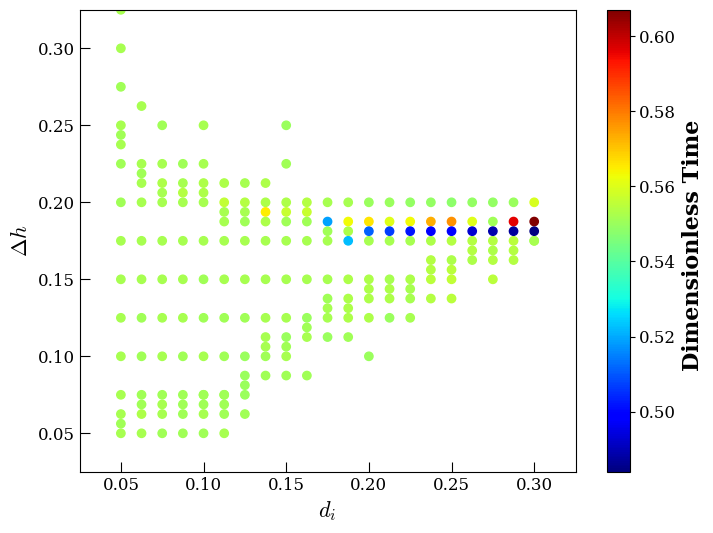

In [ ]:
# prompt: make a 2d phase diagram: x axis is results[:,0,], y - results[:,1], phase - the third element in each array of the results np array and give different shapes and colors for eah value - 0,1,-1

import matplotlib.ticker as ticker
#Style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif', 'Times New Roman', 'Computer Modern Roman'] # Better font
plt.rcParams['mathtext.fontset'] = 'cm' # Use Computer Modern fonts for math
plt.rcParams['font.size'] = 12 # Adjust font size
plt.rcParams['axes.labelsize'] = 16  # Increased label size
plt.rcParams['axes.labelweight'] = 'bold' # Made labels bold
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 18
# Create the scatter plot using a colormap
plt.figure(figsize=(8, 6))

# Use the third column of results for the color mapping
scatter = plt.scatter(results[:, 0], results[:, 1], c=results[:, 3], cmap='jet', marker='o')

# Add a colorbar to show the mapping
cbar = plt.colorbar(scatter)
cbar.set_label('Dimensionless Time ')

# Add labels and title
plt.xlabel('$d_i$')
plt.ylabel('$\Delta h $')
plt.tick_params(which='major', length=7, direction='in')
plt.tick_params(which='minor', length=4, direction='in')
plt.grid(False)
plt.xlim(0.025, 0.325)  # Set x-axis limits with padding
plt.ylim(0.025, 0.325)  # Set y-axis limits with padding
plt.savefig('di_deltah_time.pdf', format='pdf', dpi=1200)
plt.show()

<>:30: SyntaxWarning: invalid escape sequence '\D'
<>:30: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipython-input-3063087762.py:30: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta h $')


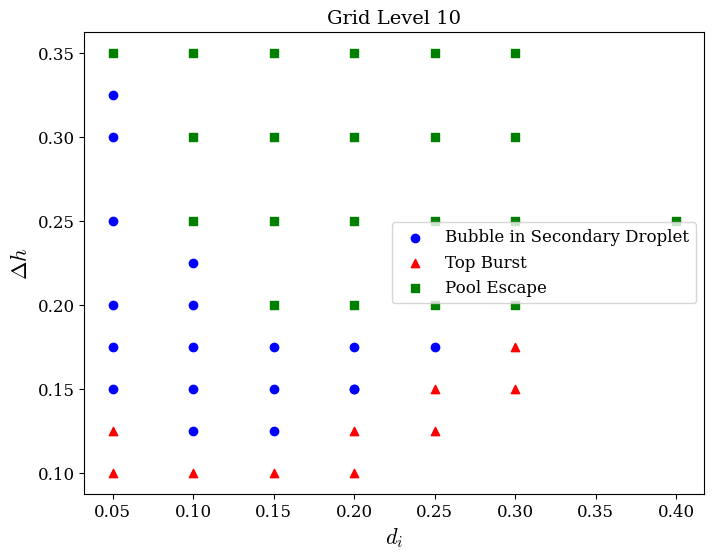

In [ ]:
# prompt: copy the code from above but replace results with tests

tests = np.array([[0.10,0.10,1],[0.05,0.10,1],[0.20,0.10,1],[0.20,0.15,0],[0.05,0.15,0],[0.40,0.25,-1],[0.30,0.30,-1],[0.30,0.20,-1],[0.25,0.20,-1],[0.20,0.20,-1],[0.20,0.15,0],[0.10,0.20,0],[0.10,0.15,0],[0.10,0.25,-1],[0.05,0.20,0],[0.15,0.10,1],[0.15,0.15,0],[0.15,0.20,-1],[0.25,0.15,1],[0.05,0.25,0],[0.05,0.30,0],[0.25,0.175,0],[0.20,0.175,0],[0.20,0.125,1],[0.15,0.125,0],[0.15,0.175,0],[0.10,0.125,0],[0.10,0.225,0],[0.05,0.350,-1],[0.05,0.325,0],[0.30,0.175,1],[0.05,0.125,1],[0.10,0.175,0],[0.05,0.175,0],[0.25,0.125,1],[0.30,0.15,1],[0.30,0.25,-1],[0.30,0.35,-1],[0.25,0.35,-1],[0.20,0.35,-1],[0.15,0.35,-1],[0.10,0.35,-1],[0.10,0.30,-1],[0.15,0.30,-1],[0.15,0.25,-1],[0.20,0.25,-1],[0.20,0.30,-1],[0.25,0.25,-1],[0.25,0.30,-1]])
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif', 'Times New Roman', 'Computer Modern Roman'] # Better font
plt.rcParams['mathtext.fontset'] = 'cm' # Use Computer Modern fonts for math
plt.rcParams['font.size'] = 12 # Adjust font size
plt.rcParams['axes.labelsize'] = 16  # Increased label size
plt.rcParams['axes.labelweight'] = 'bold' # Made labels bold
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 18
# Filter data for each phase
phase_0 = tests[tests[:, 2] == 0]
phase_1 = tests[tests[:, 2] == 1]
phase_neg1 = tests[tests[:, 2] == -1]

# Create the scatter plot
plt.figure(figsize=(8, 6))

# Plot data for each phase with different markers and colors
plt.scatter(phase_0[:, 0], phase_0[:, 1], c='blue', marker='o', label='Bubble in Secondary Droplet')
plt.scatter(phase_1[:, 0], phase_1[:, 1], c='red', marker='^', label='Top Burst')
plt.scatter(phase_neg1[:, 0], phase_neg1[:, 1], c='green', marker='s', label='Pool Escape')

# Add labels and title
plt.xlabel('$d_i$')
plt.ylabel('$\Delta h $')
plt.title('Grid Level 10')
plt.legend()
plt.savefig('phase10.pdf', format='pdf', dpi=1200)
plt.show()

(0.5, 1.0)

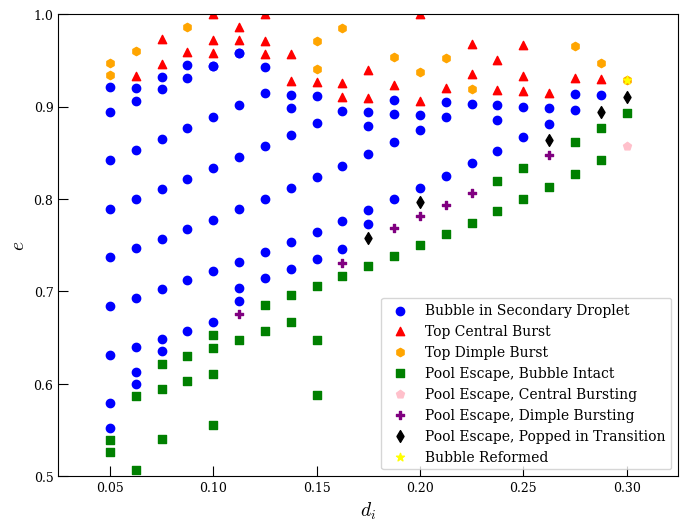

In [ ]:
#eccentricity


import matplotlib.ticker as ticker

#Style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif', 'Times New Roman', 'Computer Modern Roman'] # Better font
plt.rcParams['mathtext.fontset'] = 'cm' # Use Computer Modern fonts for math
plt.rcParams['font.size'] = 10 # Adjust font size
plt.rcParams['axes.labelsize'] = 14  # Increased label size
plt.rcParams['axes.labelweight'] = 'bold' # Made labels bold
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

# Filter data for each phase
phase_0 = results[results[:, 2] == 0]
phase_1 = results[results[:, 2] == 1]
phase_2 = results[results[:, 2] == 2]
phase_neg1 = results[results[:, 2] == -1]
phase_neg2 = results[results[:, 2] == -2]
phase_neg3 = results[results[:, 2] == -3]
phase_neg4 = results[results[:, 2] == -4]
phase_neg5 = results[results[:, 2] == -5]
# Create the scatter plot
plt.figure(figsize=(8, 6))

# Plot data for each phase with different markers and colors
plt.scatter(phase_0[:, 0], 2*(0.5 - phase_0[:, 1])/(1-phase_0[:, 0]), c='blue', marker='o', label='Bubble in Secondary Droplet')
plt.scatter(phase_1[:, 0], 2*(0.5 - phase_1[:, 1])/(1-phase_1[:, 0]), c='red', marker='^', label='Top Central Burst')
plt.scatter(phase_2[:, 0], 2*(0.5 - phase_2[:, 1])/(1-phase_2[:, 0]), c='orange', marker='h', label='Top Dimple Burst')
plt.scatter(phase_neg1[:, 0], 2*(0.5 - phase_neg1[:, 1])/(1-phase_neg1[:,0]), c='green', marker='s', label='Pool Escape, Bubble Intact')
plt.scatter(phase_neg2[:, 0], 2*(0.5 - phase_neg2[:, 1])/(1-phase_neg2[:,0]), c='pink', marker='p', label='Pool Escape, Central Bursting')
plt.scatter(phase_neg3[:, 0], 2*(0.5 - phase_neg3[:, 1])/(1-phase_neg3[:,0]), c='purple', marker='P', label='Pool Escape, Dimple Bursting')
plt.scatter(phase_neg4[:, 0], 2*(0.5 - phase_neg4[:, 1])/(1-phase_neg4[:,0]), c='black', marker='d', label='Pool Escape, Popped in Transition')
plt.scatter(phase_neg5[:, 0], 2*(0.5 - phase_neg5[:, 1])/(1-phase_neg5[:,0]), c='yellow', marker='*', label='Bubble Reformed')

# Add labels and title
plt.xlabel('$d_i$')
plt.ylabel('$e $')
plt.tick_params(which='major', length=7, direction='in')
plt.tick_params(which='minor', length=4, direction='in')
plt.legend()
plt.grid(False)
plt.xlim(0.025, 0.325)  # Set x-axis limits with padding
plt.ylim(0.5, 1)  # Set y-axis limits with padding

e vs Oh modified


(0.5, 1.0)

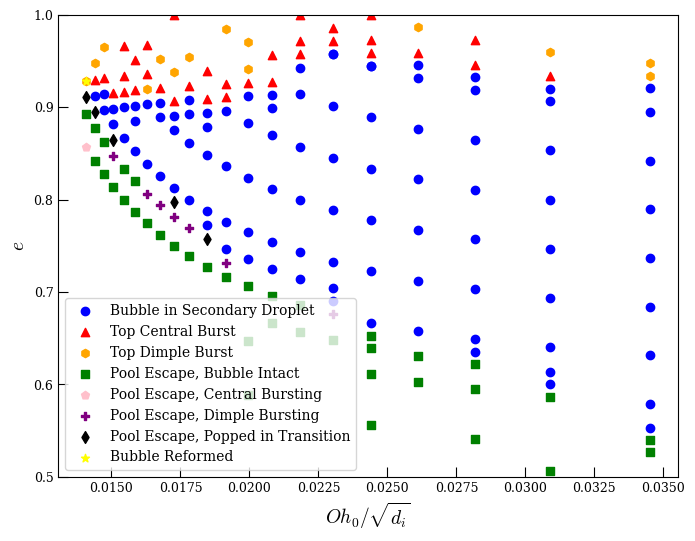

In [ ]:
#eccentricity vs Oh0


import matplotlib.ticker as ticker

#Style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif', 'Times New Roman', 'Computer Modern Roman'] # Better font
plt.rcParams['mathtext.fontset'] = 'cm' # Use Computer Modern fonts for math
plt.rcParams['font.size'] = 10 # Adjust font size
plt.rcParams['axes.labelsize'] = 14  # Increased label size
plt.rcParams['axes.labelweight'] = 'bold' # Made labels bold
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

# Filter data for each phase
phase_0 = results[results[:, 2] == 0]
phase_1 = results[results[:, 2] == 1]
phase_2 = results[results[:, 2] == 2]
phase_neg1 = results[results[:, 2] == -1]
phase_neg2 = results[results[:, 2] == -2]
phase_neg3 = results[results[:, 2] == -3]
phase_neg4 = results[results[:, 2] == -4]
phase_neg5 = results[results[:, 2] == -5]
# Create the scatter plot
plt.figure(figsize=(8, 6))

# Plot data for each phase with different markers and colors
plt.scatter(Oh0/np.sqrt(phase_0[:, 0]), 2*(0.5 - phase_0[:, 1])/(1-phase_0[:, 0]), c='blue', marker='o', label='Bubble in Secondary Droplet')
plt.scatter(Oh0/np.sqrt(phase_1[:, 0]), 2*(0.5 - phase_1[:, 1])/(1-phase_1[:, 0]), c='red', marker='^', label='Top Central Burst')
plt.scatter(Oh0/np.sqrt(phase_2[:, 0]), 2*(0.5 - phase_2[:, 1])/(1-phase_2[:, 0]), c='orange', marker='h', label='Top Dimple Burst')
plt.scatter(Oh0/np.sqrt(phase_neg1[:,0]), 2*(0.5 - phase_neg1[:, 1])/(1-phase_neg1[:,0]), c='green', marker='s', label='Pool Escape, Bubble Intact')
plt.scatter(Oh0/np.sqrt(phase_neg2[:,0]), 2*(0.5 - phase_neg2[:, 1])/(1-phase_neg2[:,0]), c='pink', marker='p', label='Pool Escape, Central Bursting')
plt.scatter(Oh0/np.sqrt(phase_neg3[:,0]), 2*(0.5 - phase_neg3[:, 1])/(1-phase_neg3[:,0]), c='purple', marker='P', label='Pool Escape, Dimple Bursting')
plt.scatter(Oh0/np.sqrt(phase_neg4[:,0]), 2*(0.5 - phase_neg4[:, 1])/(1-phase_neg4[:,0]), c='black', marker='d', label='Pool Escape, Popped in Transition')
plt.scatter(Oh0/np.sqrt(phase_neg5[:,0]), 2*(0.5 - phase_neg5[:, 1])/(1-phase_neg5[:,0]), c='yellow', marker='*', label='Bubble Reformed')


# Add labels and title
plt.xlabel('$Oh_0/\sqrt{d_i}$')
plt.ylabel('$e$')
plt.tick_params(which='major', length=7, direction='in')
plt.tick_params(which='minor', length=4, direction='in')
plt.legend()
plt.grid(False)
#plt.xlim(0.05, 0.2)  # Set x-axis limits with padding
plt.ylim(0.5, 1)  # Set y-axis limits with padding

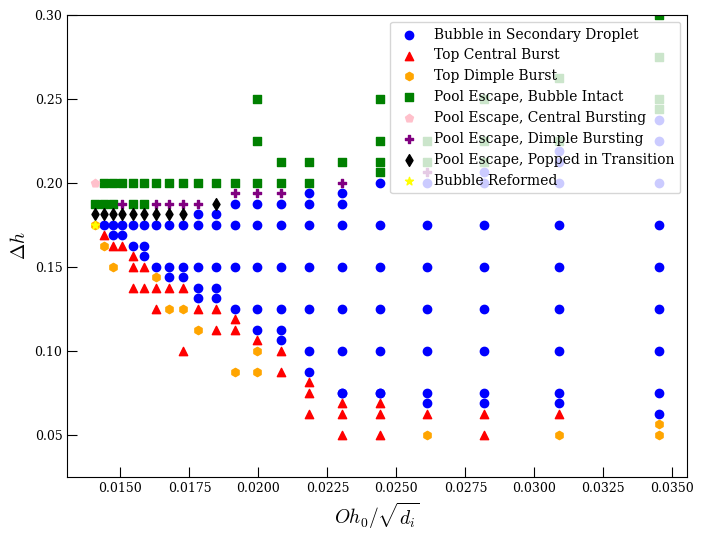

In [ ]:
#height vs Oh0


import matplotlib.ticker as ticker

#Style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif', 'Times New Roman', 'Computer Modern Roman'] # Better font
plt.rcParams['mathtext.fontset'] = 'cm' # Use Computer Modern fonts for math
plt.rcParams['font.size'] = 10 # Adjust font size
plt.rcParams['axes.labelsize'] = 14  # Increased label size
plt.rcParams['axes.labelweight'] = 'bold' # Made labels bold
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

# Filter data for each phase
phase_0 = results[results[:, 2] == 0]
phase_1 = results[results[:, 2] == 1]
phase_2 = results[results[:, 2] == 2]
phase_neg1 = results[results[:, 2] == -1]
phase_neg2 = results[results[:, 2] == -2]
phase_neg3 = results[results[:, 2] == -3]
phase_neg4 = results[results[:, 2] == -4]
phase_neg5 = results[results[:, 2] == -5]
# Create the scatter plot
plt.figure(figsize=(8, 6))

# Plot data for each phase with different markers and colors
plt.scatter(Oh0/np.sqrt(phase_0[:, 0]), phase_0[:, 1], c='blue', marker='o', label='Bubble in Secondary Droplet')
plt.scatter(Oh0/np.sqrt(phase_1[:, 0]), phase_1[:, 1], c='red', marker='^', label='Top Central Burst')
plt.scatter(Oh0/np.sqrt(phase_2[:, 0]), phase_2[:, 1], c='orange', marker='h', label='Top Dimple Burst')
plt.scatter(Oh0/np.sqrt(phase_neg1[:,0]), phase_neg1[:, 1], c='green', marker='s', label='Pool Escape, Bubble Intact')
plt.scatter(Oh0/np.sqrt(phase_neg2[:,0]), phase_neg2[:, 1], c='pink', marker='p', label='Pool Escape, Central Bursting')
plt.scatter(Oh0/np.sqrt(phase_neg3[:,0]), phase_neg3[:, 1], c='purple', marker='P', label='Pool Escape, Dimple Bursting')
plt.scatter(Oh0/np.sqrt(phase_neg4[:,0]), phase_neg4[:, 1], c='black', marker='d', label='Pool Escape, Popped in Transition')
plt.scatter(Oh0/np.sqrt(phase_neg5[:,0]), phase_neg5[:, 1], c='yellow', marker='*', label='Bubble Reformed')


# Add labels and title
plt.xlabel('$Oh_0/\sqrt{d_i}$')
plt.ylabel('$\Delta h$')
plt.tick_params(which='major', length=7, direction='in')
plt.tick_params(which='minor', length=4, direction='in')
plt.legend()
plt.grid(False)
plt.ylim(0.025, 0.3)  # Set x-axis limits with padding
plt.show()

In [ ]:
print(np.sqrt(Oh0))

0.08785923113645254


<>:51: SyntaxWarning: invalid escape sequence '\D'
<>:51: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipython-input-439062028.py:51: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta h $')


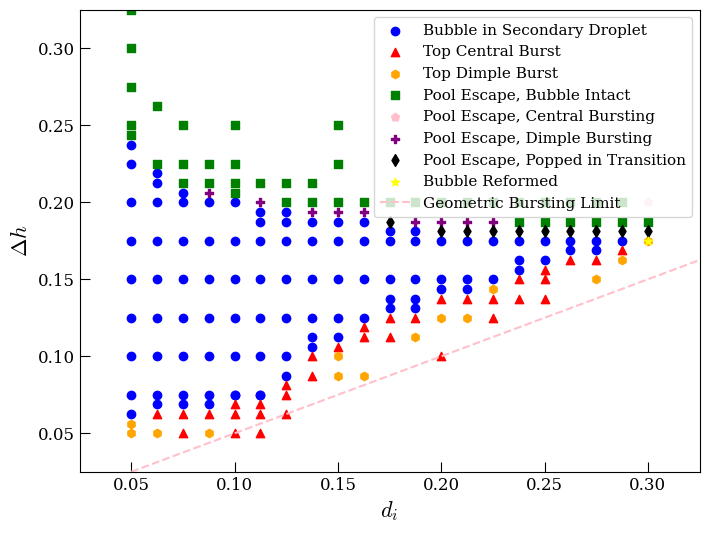

In [ ]:
# nomrla but added line for breaking for h_waves_min = 0.94312

# prompt: make a 2d phase diagram: x axis is results[:,0,], y - results[:,1], phase - the third element in each array of the results np array and give different shapes and colors for eah value - 0,1,-1

h_min = 0.94312


import matplotlib.ticker as ticker

#Style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif', 'Times New Roman', 'Computer Modern Roman'] # Better font
plt.rcParams['mathtext.fontset'] = 'cm' # Use Computer Modern fonts for math
plt.rcParams['font.size'] = 12 # Adjust font size
plt.rcParams['axes.labelsize'] = 16  # Increased label size
plt.rcParams['axes.labelweight'] = 'bold' # Made labels bold
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['figure.titlesize'] = 18

# Filter data for each phase
phase_0 = results[results[:, 2] == 0]
phase_1 = results[results[:, 2] == 1]
phase_2 = results[results[:, 2] == 2]
phase_neg1 = results[results[:, 2] == -1]
phase_neg2 = results[results[:, 2] == -2]
phase_neg3 = results[results[:, 2] == -3]
phase_neg4 = results[results[:, 2] == -4]
phase_neg5 = results[results[:, 2] == -5]
# Create the scatter plot
plt.figure(figsize=(8, 6))

# Plot data for each phase with different markers and colors
plt.scatter(phase_0[:, 0], phase_0[:, 1], c='blue', marker='o', label='Bubble in Secondary Droplet')
plt.scatter(phase_1[:, 0], phase_1[:, 1], c='red', marker='^', label='Top Central Burst')
plt.scatter(phase_2[:, 0], phase_2[:, 1], c='orange', marker='h', label='Top Dimple Burst')
plt.scatter(phase_neg1[:, 0], phase_neg1[:, 1], c='green', marker='s', label='Pool Escape, Bubble Intact')
plt.scatter(phase_neg2[:, 0], phase_neg2[:, 1], c='pink', marker='p', label='Pool Escape, Central Bursting')
plt.scatter(phase_neg3[:, 0], phase_neg3[:, 1], c='purple', marker='P', label='Pool Escape, Dimple Bursting')
plt.scatter(phase_neg4[:, 0], phase_neg4[:, 1], c='black', marker='d', label='Pool Escape, Popped in Transition')
plt.scatter(phase_neg5[:, 0], phase_neg5[:, 1], c='yellow', marker='*', label='Bubble Reformed')

# Add the line
d_i = np.linspace(0.025, 0.325, 100)  # Create a range of d_i values
y = 0.5*d_i
plt.plot(d_i, y, color='pink', linestyle='--', label='Geometric Bursting Limit')
# Add labels and title
plt.xlabel('$d_i$')
plt.ylabel('$\Delta h $')
plt.tick_params(which='major', length=7, direction='in')
plt.tick_params(which='minor', length=4, direction='in')
plt.legend()
plt.grid(False)
plt.xlim(0.025, 0.325)  # Set x-axis limits with padding
plt.ylim(0.025, 0.325)  # Set y-axis limits with padding
plt.savefig('di_deltah_complete_geom.pdf', format='pdf', dpi=1200)
plt.show()

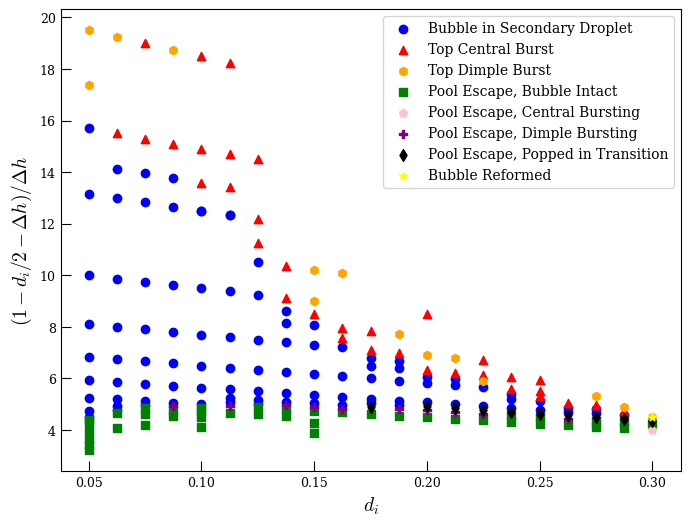

In [ ]:
#eccentricity vs PI intertial time to viscous time


import matplotlib.ticker as ticker
import numpy as np

#Style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif', 'Times New Roman', 'Computer Modern Roman'] # Better font
plt.rcParams['mathtext.fontset'] = 'cm' # Use Computer Modern fonts for math
plt.rcParams['font.size'] = 10 # Adjust font size
plt.rcParams['axes.labelsize'] = 14  # Increased label size
plt.rcParams['axes.labelweight'] = 'bold' # Made labels bold
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

# Filter data for each phase
phase_0 = results[results[:, 2] == 0]
phase_1 = results[results[:, 2] == 1]
phase_2 = results[results[:, 2] == 2]
phase_neg1 = results[results[:, 2] == -1]
phase_neg2 = results[results[:, 2] == -2]
phase_neg3 = results[results[:, 2] == -3]
phase_neg4 = results[results[:, 2] == -4]
phase_neg5 = results[results[:, 2] == -5]
# Create the scatter plot
plt.figure(figsize=(8, 6))

# Plot data for each phase with different markers and colors
plt.scatter(phase_0[:, 0], (1-phase_0[:,0]+phase_0[:,1]/2)/phase_0[:,1], c='blue', marker='o', label='Bubble in Secondary Droplet')
plt.scatter(phase_1[:, 0], (1-phase_1[:,0]+phase_1[:,1]/2)/phase_1[:,1], c='red', marker='^', label='Top Central Burst')
plt.scatter(phase_2[:, 0], (1-phase_2[:,0]+phase_2[:,1]/2)/phase_2[:,1], c='orange', marker='h', label='Top Dimple Burst')
plt.scatter(phase_neg1[:, 0], (1-phase_neg1[:,0]+phase_neg1[:,1]/2)/phase_neg1[:,1], c='green', marker='s', label='Pool Escape, Bubble Intact')
plt.scatter(phase_neg2[:, 0], (1-phase_neg2[:,0]+phase_neg2[:,1]/2)/phase_neg2[:,1], c='pink', marker='p', label='Pool Escape, Central Bursting')
plt.scatter(phase_neg3[:, 0], (1-phase_neg3[:,0]+phase_neg3[:,1]/2)/phase_neg3[:,1], c='purple', marker='P', label='Pool Escape, Dimple Bursting')
plt.scatter(phase_neg4[:, 0],(1-phase_neg4[:,0]+phase_neg4[:,1]/2)/phase_neg4[:,1], c='black', marker='d', label='Pool Escape, Popped in Transition')
plt.scatter(phase_neg5[:, 0], (1-phase_neg5[:,0]+phase_neg5[:,1]/2)/phase_neg5[:,1], c='yellow', marker='*', label='Bubble Reformed')

# Add labels and title
plt.xlabel('$d_i$')
plt.ylabel('${(1-d_i/2-\Delta h)/ \Delta h}$')
plt.tick_params(which='major', length=7, direction='in')
plt.tick_params(which='minor', length=4, direction='in')
plt.legend()
plt.grid(False)
#plt.ylim(4, 5)  # Set y-axis limits with padding

(2.5, 3.5)

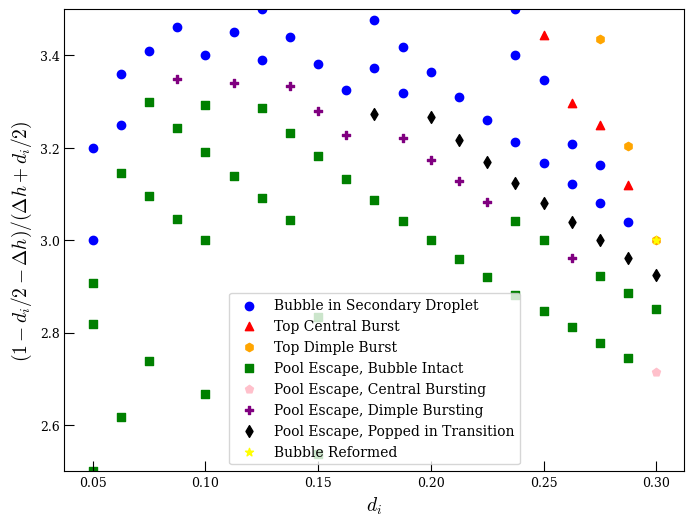

In [ ]:
#eccentricity vs PI intertial time to viscous time


import matplotlib.ticker as ticker
import numpy as np

#Style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif', 'Times New Roman', 'Computer Modern Roman'] # Better font
plt.rcParams['mathtext.fontset'] = 'cm' # Use Computer Modern fonts for math
plt.rcParams['font.size'] = 10 # Adjust font size
plt.rcParams['axes.labelsize'] = 14  # Increased label size
plt.rcParams['axes.labelweight'] = 'bold' # Made labels bold
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

# Filter data for each phase
phase_0 = results[results[:, 2] == 0]
phase_1 = results[results[:, 2] == 1]
phase_2 = results[results[:, 2] == 2]
phase_neg1 = results[results[:, 2] == -1]
phase_neg2 = results[results[:, 2] == -2]
phase_neg3 = results[results[:, 2] == -3]
phase_neg4 = results[results[:, 2] == -4]
phase_neg5 = results[results[:, 2] == -5]
# Create the scatter plot
plt.figure(figsize=(8, 6))

# Plot data for each phase with different markers and colors
plt.scatter(phase_0[:, 0], (1-phase_0[:,1]+phase_0[:,0]/2)/(phase_0[:,1]+phase_0[:,0]/2), c='blue', marker='o', label='Bubble in Secondary Droplet')
plt.scatter(phase_1[:, 0], (1-phase_1[:,1]+phase_1[:,0]/2)/(phase_1[:,1]+phase_1[:,0]/2), c='red', marker='^', label='Top Central Burst')
plt.scatter(phase_2[:, 0], (1-phase_2[:,1]+phase_2[:,0]/2)/(phase_2[:,1]+phase_2[:,0]/2), c='orange', marker='h', label='Top Dimple Burst')
plt.scatter(phase_neg1[:, 0], (1-phase_neg1[:,1]+phase_neg1[:,0]/2)/(phase_neg1[:,1]+phase_neg1[:,0]/2), c='green', marker='s', label='Pool Escape, Bubble Intact')
plt.scatter(phase_neg2[:, 0], (1-phase_neg2[:,1]+phase_neg2[:,0]/2)/(phase_neg2[:,1]+phase_neg2[:,0]/2), c='pink', marker='p', label='Pool Escape, Central Bursting')
plt.scatter(phase_neg3[:, 0], (1-phase_neg3[:,1]+phase_neg3[:,0]/2)/(phase_neg3[:,1]+phase_neg3[:,0]/2), c='purple', marker='P', label='Pool Escape, Dimple Bursting')
plt.scatter(phase_neg4[:, 0],(1-phase_neg4[:,1]+phase_neg4[:,0]/2)/(phase_neg4[:,1]+phase_neg4[:,0]/2), c='black', marker='d', label='Pool Escape, Popped in Transition')
plt.scatter(phase_neg5[:, 0], (1-phase_neg5[:,1]+phase_neg5[:,0]/2)/(phase_neg5[:,1]+phase_neg5[:,0]/2), c='yellow', marker='*', label='Bubble Reformed')

# Add labels and title
plt.xlabel('$d_i$')
plt.ylabel('${(1-d_i/2-\Delta h)/ (\Delta h + d_i/2)}$')
plt.tick_params(which='major', length=7, direction='in')
plt.tick_params(which='minor', length=4, direction='in')
plt.legend()
plt.grid(False)
plt.ylim(2.5, 3.5)  # Set y-axis limits with padding

In [ ]:
#eccentricity vs PI intertial time to viscous time


import matplotlib.ticker as ticker
import numpy as np

#Style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif', 'Times New Roman', 'Computer Modern Roman'] # Better font
plt.rcParams['mathtext.fontset'] = 'cm' # Use Computer Modern fonts for math
plt.rcParams['font.size'] = 10 # Adjust font size
plt.rcParams['axes.labelsize'] = 14  # Increased label size
plt.rcParams['axes.labelweight'] = 'bold' # Made labels bold
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

# Filter data for each phase
phase_0 = results[results[:, 2] == 0]
phase_1 = results[results[:, 2] == 1]
phase_2 = results[results[:, 2] == 2]
phase_neg1 = results[results[:, 2] == -1]
phase_neg2 = results[results[:, 2] == -2]
phase_neg3 = results[results[:, 2] == -3]
phase_neg4 = results[results[:, 2] == -4]
phase_neg5 = results[results[:, 2] == -5]
# Create the scatter plot
plt.figure(figsize=(8, 6))

# Plot data for each phase with different markers and colors
plt.scatter(phase_0[:, 0], 1/(phase_0[:,1]+phase_0[:,0]/2), c='blue', marker='o', label='Bubble in Secondary Droplet')
plt.scatter(phase_1[:, 0], (1-phase_1[:,1]+phase_1[:,0]/2)/(phase_1[:,1]+phase_1[:,0]/2), c='red', marker='^', label='Top Central Burst')
plt.scatter(phase_2[:, 0], (1-phase_2[:,1]+phase_2[:,0]/2)/(phase_2[:,1]+phase_2[:,0]/2), c='orange', marker='h', label='Top Dimple Burst')
plt.scatter(phase_neg1[:, 0], (1-phase_neg1[:,1]+phase_neg1[:,0]/2)/(phase_neg1[:,1]+phase_neg1[:,0]/2), c='green', marker='s', label='Pool Escape, Bubble Intact')
plt.scatter(phase_neg2[:, 0], (1-phase_neg2[:,1]+phase_neg2[:,0]/2)/(phase_neg2[:,1]+phase_neg2[:,0]/2), c='pink', marker='p', label='Pool Escape, Central Bursting')
plt.scatter(phase_neg3[:, 0], (1-phase_neg3[:,1]+phase_neg3[:,0]/2)/(phase_neg3[:,1]+phase_neg3[:,0]/2), c='purple', marker='P', label='Pool Escape, Dimple Bursting')
plt.scatter(phase_neg4[:, 0],(1-phase_neg4[:,1]+phase_neg4[:,0]/2)/(phase_neg4[:,1]+phase_neg4[:,0]/2), c='black', marker='d', label='Pool Escape, Popped in Transition')
plt.scatter(phase_neg5[:, 0], (1-phase_neg5[:,1]+phase_neg5[:,0]/2)/(phase_neg5[:,1]+phase_neg5[:,0]/2), c='yellow', marker='*', label='Bubble Reformed')

# Add labels and title
plt.xlabel('$d_i$')
plt.ylabel('${(1-d_i/2-\Delta h)/ (\Delta h + d_i/2)}$')
plt.tick_params(which='major', length=7, direction='in')
plt.tick_params(which='minor', length=4, direction='in')
plt.legend()
plt.grid(False)
#plt.ylim(2.5, 3.5)  # Set y-axis limits with padding

NameError: name 'results' is not defined

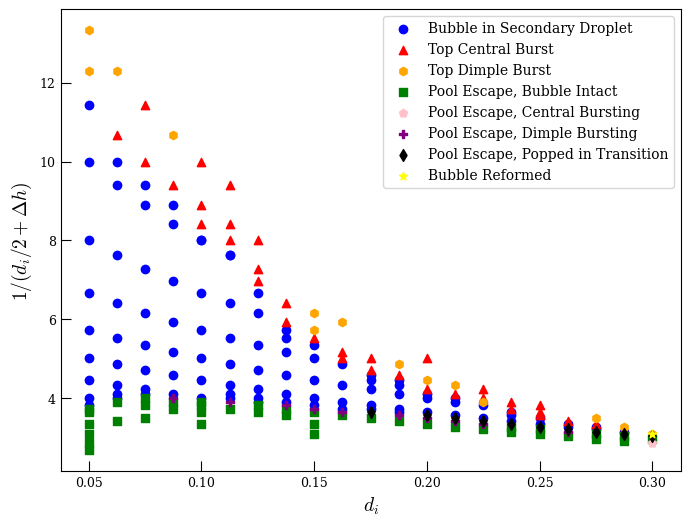

In [ ]:
#eccentricity vs PI intertial time to viscous time


import matplotlib.ticker as ticker
import numpy as np

#Style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif', 'Times New Roman', 'Computer Modern Roman'] # Better font
plt.rcParams['mathtext.fontset'] = 'cm' # Use Computer Modern fonts for math
plt.rcParams['font.size'] = 10 # Adjust font size
plt.rcParams['axes.labelsize'] = 14  # Increased label size
plt.rcParams['axes.labelweight'] = 'bold' # Made labels bold
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

# Filter data for each phase
phase_0 = results[results[:, 2] == 0]
phase_1 = results[results[:, 2] == 1]
phase_2 = results[results[:, 2] == 2]
phase_neg1 = results[results[:, 2] == -1]
phase_neg2 = results[results[:, 2] == -2]
phase_neg3 = results[results[:, 2] == -3]
phase_neg4 = results[results[:, 2] == -4]
phase_neg5 = results[results[:, 2] == -5]
# Create the scatter plot
plt.figure(figsize=(8, 6))

# Plot data for each phase with different markers and colors
plt.scatter(phase_0[:, 0], 1/(phase_0[:,1]+phase_0[:,0]/2), c='blue', marker='o', label='Bubble in Secondary Droplet')
plt.scatter(phase_1[:, 0], 1/(phase_1[:,1]+phase_1[:,0]/2), c='red', marker='^', label='Top Central Burst')
plt.scatter(phase_2[:, 0], 1/(phase_2[:,1]+phase_2[:,0]/2), c='orange', marker='h', label='Top Dimple Burst')
plt.scatter(phase_neg1[:, 0], 1/(phase_neg1[:,1]+phase_neg1[:,0]/2), c='green', marker='s', label='Pool Escape, Bubble Intact')
plt.scatter(phase_neg2[:, 0], 1/(phase_neg2[:,1]+phase_neg2[:,0]/2), c='pink', marker='p', label='Pool Escape, Central Bursting')
plt.scatter(phase_neg3[:, 0], 1/(phase_neg3[:,1]+phase_neg3[:,0]/2), c='purple', marker='P', label='Pool Escape, Dimple Bursting')
plt.scatter(phase_neg4[:, 0],1/(phase_neg4[:,1]+phase_neg4[:,0]/2), c='black', marker='d', label='Pool Escape, Popped in Transition')
plt.scatter(phase_neg5[:, 0], 1/(phase_neg5[:,1]+phase_neg5[:,0]/2), c='yellow', marker='*', label='Bubble Reformed')

# Add labels and title
plt.xlabel('$d_i$')
plt.ylabel('${1/(d_i/2+\Delta h) }$')
plt.tick_params(which='major', length=7, direction='in')
plt.tick_params(which='minor', length=4, direction='in')
plt.legend()
plt.grid(False)
#plt.ylim(2.5, 5.5)  # Set y-axis limits with padding

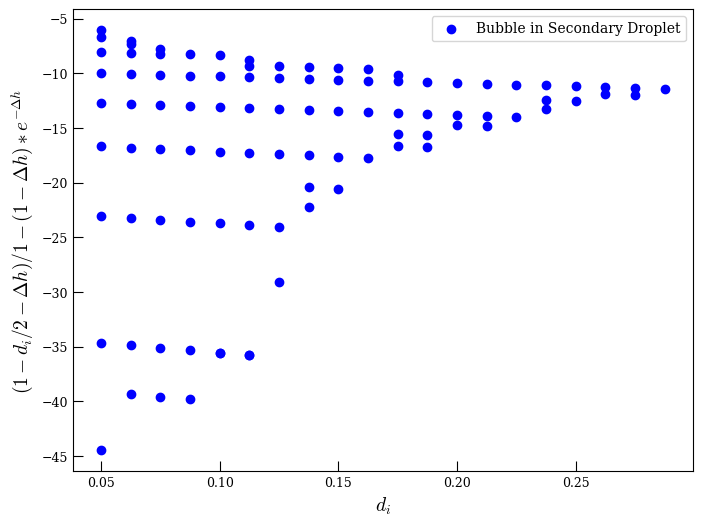

In [ ]:
#eccentricity vs PI intertial time to viscous time


import matplotlib.ticker as ticker
import numpy as np

#Style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif', 'Times New Roman', 'Computer Modern Roman'] # Better font
plt.rcParams['mathtext.fontset'] = 'cm' # Use Computer Modern fonts for math
plt.rcParams['font.size'] = 10 # Adjust font size
plt.rcParams['axes.labelsize'] = 14  # Increased label size
plt.rcParams['axes.labelweight'] = 'bold' # Made labels bold
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

# Filter data for each phase
phase_0 = results[results[:, 2] == 0]
phase_1 = results[results[:, 2] == 1]
phase_2 = results[results[:, 2] == 2]
phase_neg1 = results[results[:, 2] == -1]
phase_neg2 = results[results[:, 2] == -2]
phase_neg3 = results[results[:, 2] == -3]
phase_neg4 = results[results[:, 2] == -4]
phase_neg5 = results[results[:, 2] == -5]
# Create the scatter plot
plt.figure(figsize=(8, 6))

# Plot data for each phase with different markers and colors
plt.scatter(phase_0[:, 0], (1-phase_0[:,1]+phase_0[:,0]/2 -0.0225)/(phase_0[:,1]*(1-phase_0[:,1])/np.log(phase_0[:,1])), c='blue', marker='o', label='Bubble in Secondary Droplet')
#plt.scatter(phase_1[:, 0], (1-phase_1[:,1]+phase_1[:,0]/2)/(1-(1-phase_1[:,1])**2), c='red', marker='^', label='Top Central Burst')
#plt.scatter(phase_2[:, 0], (1-phase_2[:,1]+phase_2[:,0]/2)/(1-(1-phase_2[:,1])**2), c='orange', marker='h', label='Top Dimple Burst')
#plt.scatter(phase_neg1[:, 0], (1-phase_neg1[:,1]+phase_neg1[:,0]/2)/(1-(1-phase_neg1[:,1])**2), c='green', marker='s', label='Pool Escape, Bubble Intact')
#plt.scatter(phase_neg2[:, 0], (1-phase_neg2[:,1]+phase_neg2[:,0]/2)/(1-(1-phase_neg2[:,1])**2), c='pink', marker='p', label='Pool Escape, Central Bursting')
#plt.scatter(phase_neg3[:, 0], (1-phase_neg3[:,1]+phase_neg3[:,0]/2)/(1-(1-phase_neg3[:,1])**2), c='purple', marker='P', label='Pool Escape, Dimple Bursting')
#plt.scatter(phase_neg4[:, 0],(1-phase_neg4[:,1]+phase_neg4[:,0]/2)/(1-(1-phase_neg4[:,1])**2), c='black', marker='d', label='Pool Escape, Popped in Transition')
#plt.scatter(phase_neg5[:, 0], (1-phase_neg5[:,1]+phase_neg5[:,0]/2)/(1-(1-phase_neg5[:,1])**2), c='yellow', marker='*', label='Bubble Reformed')

# Add labels and title
plt.xlabel('$d_i$')
plt.ylabel('${(1-d_i/2-\Delta h)/ 1-(1-\Delta h)*e^{- \Delta h} }$')
plt.tick_params(which='major', length=7, direction='in')
plt.tick_params(which='minor', length=4, direction='in')
plt.legend()
plt.grid(False)
#plt.ylim(2.5, 5.5)  # Set y-axis limits with padding

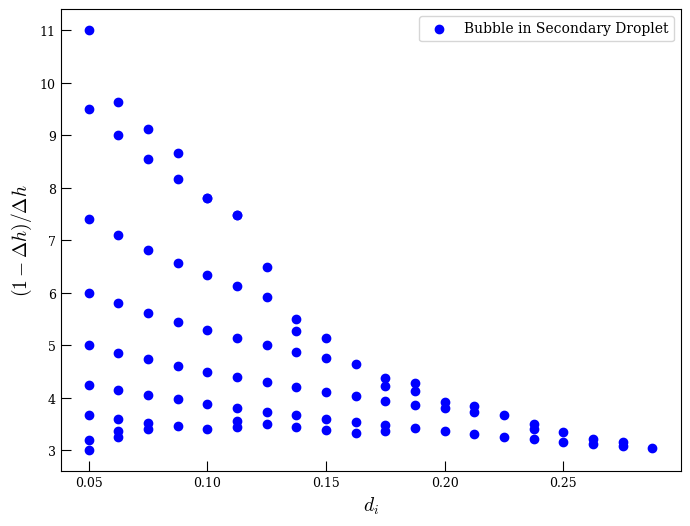

In [ ]:
#eccentricity vs PI intertial time to viscous time


import matplotlib.ticker as ticker
import numpy as np

#Style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif', 'Times New Roman', 'Computer Modern Roman'] # Better font
plt.rcParams['mathtext.fontset'] = 'cm' # Use Computer Modern fonts for math
plt.rcParams['font.size'] = 10 # Adjust font size
plt.rcParams['axes.labelsize'] = 14  # Increased label size
plt.rcParams['axes.labelweight'] = 'bold' # Made labels bold
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

# Filter data for each phase
phase_0 = results[results[:, 2] == 0]
phase_1 = results[results[:, 2] == 1]
phase_2 = results[results[:, 2] == 2]
phase_neg1 = results[results[:, 2] == -1]
phase_neg2 = results[results[:, 2] == -2]
phase_neg3 = results[results[:, 2] == -3]
phase_neg4 = results[results[:, 2] == -4]
phase_neg5 = results[results[:, 2] == -5]
# Create the scatter plot
plt.figure(figsize=(8, 6))

# Plot data for each phase with different markers and colors
plt.scatter(phase_0[:, 0], (1-phase_0[:,1]+phase_0[:,0]/2)/(phase_0[:,1]+phase_0[:,0]/2), c='blue', marker='o', label='Bubble in Secondary Droplet')
#plt.scatter(phase_1[:, 0], (1-phase_1[:,1])/(phase_1[:,1]), c='red', marker='^', label='Top Central Burst')
#plt.scatter(phase_2[:, 0], (1-phase_2[:,1])/(phase_2[:,1]), c='orange', marker='h', label='Top Dimple Burst')
#plt.scatter(phase_neg1[:, 0], (1-phase_neg1[:,1])/(phase_neg1[:,1]), c='green', marker='s', label='Pool Escape, Bubble Intact')
#plt.scatter(phase_neg2[:, 0], (1-phase_neg2[:,1])/(phase_neg2[:,1]), c='pink', marker='p', label='Pool Escape, Central Bursting')
#plt.scatter(phase_neg3[:, 0], (1-phase_neg3[:,1])/(phase_neg3[:,1]), c='purple', marker='P', label='Pool Escape, Dimple Bursting')
#plt.scatter(phase_neg4[:, 0],(1-phase_neg4[:,1])/(phase_neg4[:,1]), c='black', marker='d', label='Pool Escape, Popped in Transition')
#plt.scatter(phase_neg5[:, 0], (1-phase_neg5[:,1])/(phase_neg5[:,1]), c='yellow', marker='*', label='Bubble Reformed')

# Add labels and title
plt.xlabel('$d_i$')
plt.ylabel('${(1-\Delta h)/ \Delta h }$')
plt.tick_params(which='major', length=7, direction='in')
plt.tick_params(which='minor', length=4, direction='in')
plt.legend()
plt.grid(False)
#plt.ylim(2.5, 5.5)  # Set y-axis limits with padding

<>:44: SyntaxWarning: invalid escape sequence '\d'
<>:44: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3512212238.py:44: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel('$\delta h  = \Delta h - d_i /2$')


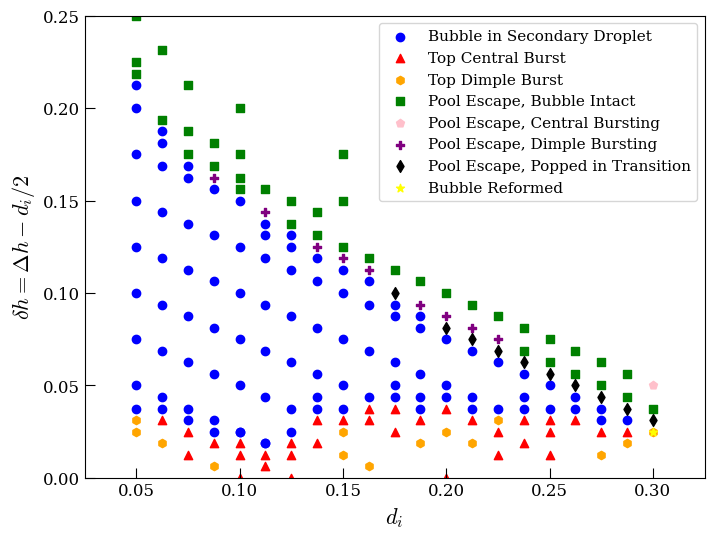

In [ ]:
#simple 0.5 d h
import matplotlib.ticker as ticker

#Style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif', 'Times New Roman', 'Computer Modern Roman'] # Better font
plt.rcParams['mathtext.fontset'] = 'cm' # Use Computer Modern fonts for math
plt.rcParams['font.size'] = 12 # Adjust font size
plt.rcParams['axes.labelsize'] = 16  # Increased label size
plt.rcParams['axes.labelweight'] = 'bold' # Made labels bold
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['figure.titlesize'] = 18

# Filter data for each phase
phase_0 = results[results[:, 2] == 0]
phase_1 = results[results[:, 2] == 1]
phase_2 = results[results[:, 2] == 2]
phase_neg1 = results[results[:, 2] == -1]
phase_neg2 = results[results[:, 2] == -2]

#0.006615696891759504

phase_neg3 = results[results[:, 2] == -3]
phase_neg4 = results[results[:, 2] == -4]
phase_neg5 = results[results[:, 2] == -5]
# Create the scatter plot
plt.figure(figsize=(8, 6))

# Plot data for each phase with different markers and colors
plt.scatter(phase_0[:, 0], phase_0[:, 1]-phase_0[:,0]*0.5, c='blue', marker='o', label='Bubble in Secondary Droplet')
plt.scatter(phase_1[:, 0], phase_1[:, 1]-phase_1[:,0]*0.5, c='red', marker='^', label='Top Central Burst')
plt.scatter(phase_2[:, 0], phase_2[:, 1]-phase_2[:,0]*0.5, c='orange', marker='h', label='Top Dimple Burst')
plt.scatter(phase_neg1[:, 0], phase_neg1[:, 1]-phase_neg1[:,0]*0.5, c='green', marker='s', label='Pool Escape, Bubble Intact')
plt.scatter(phase_neg2[:, 0], phase_neg2[:, 1]-phase_neg2[:,0]*0.5, c='pink', marker='p', label='Pool Escape, Central Bursting')
plt.scatter(phase_neg3[:, 0], phase_neg3[:, 1]-phase_neg3[:,0]*0.5, c='purple', marker='P', label='Pool Escape, Dimple Bursting')
plt.scatter(phase_neg4[:, 0], phase_neg4[:, 1]-phase_neg4[:,0]*0.5, c='black', marker='d', label='Pool Escape, Popped in Transition')
plt.scatter(phase_neg5[:, 0], phase_neg5[:, 1]-phase_neg5[:,0]*0.5, c='yellow', marker='*', label='Bubble Reformed')

# Add labels and title
plt.xlabel('$d_i$')
plt.ylabel('$\delta h  = \Delta h - d_i /2$')
plt.tick_params(which='major', length=7, direction='in')
plt.tick_params(which='minor', length=4, direction='in')
plt.legend()
plt.grid(False)
plt.xlim(0.025, 0.325)  # Set x-axis limits with padding
plt.ylim(0., 0.25)  # Set y-axis limits with padding
plt.savefig('unzoom.pdf', format='pdf', dpi=1200)
plt.show()

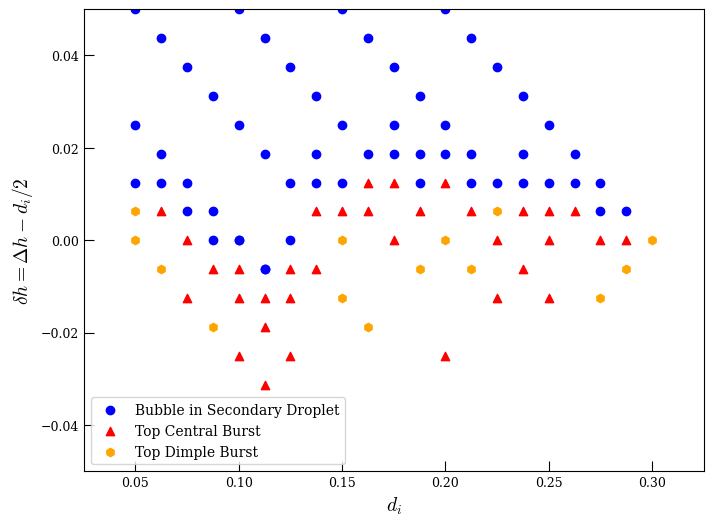

In [ ]:
#simple 0.5 d h 0.025
import matplotlib.ticker as ticker

#Style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif', 'Times New Roman', 'Computer Modern Roman'] # Better font
plt.rcParams['mathtext.fontset'] = 'cm' # Use Computer Modern fonts for math
plt.rcParams['font.size'] = 10 # Adjust font size
plt.rcParams['axes.labelsize'] = 14  # Increased label size
plt.rcParams['axes.labelweight'] = 'bold' # Made labels bold
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

# Filter data for each phase
phase_0 = results[results[:, 2] == 0]
phase_1 = results[results[:, 2] == 1]
phase_2 = results[results[:, 2] == 2]
phase_neg1 = results[results[:, 2] == -1]
phase_neg2 = results[results[:, 2] == -2]

#0.006615696891759504

phase_neg3 = results[results[:, 2] == -3]
phase_neg4 = results[results[:, 2] == -4]
phase_neg5 = results[results[:, 2] == -5]
# Create the scatter plot
plt.figure(figsize=(8, 6))

# Plot data for each phase with different markers and colors
plt.scatter(phase_0[:, 0], phase_0[:, 1]-phase_0[:,0]*0.5-0.025, c='blue', marker='o', label='Bubble in Secondary Droplet')
plt.scatter(phase_1[:, 0], phase_1[:, 1]-phase_1[:,0]*0.5-0.025, c='red', marker='^', label='Top Central Burst')
plt.scatter(phase_2[:, 0], phase_2[:, 1]-phase_2[:,0]*0.5-0.025, c='orange', marker='h', label='Top Dimple Burst')

# Add labels and title
plt.xlabel('$d_i$')
plt.ylabel('$\delta h  = \Delta h - d_i /2$')
plt.tick_params(which='major', length=7, direction='in')
plt.tick_params(which='minor', length=4, direction='in')
plt.legend()
plt.grid(False)
plt.xlim(0.025, 0.325)  # Set x-axis limits with padding
plt.ylim(-0.05, 0.05)  # Set y-axis limits with padding
plt.show()

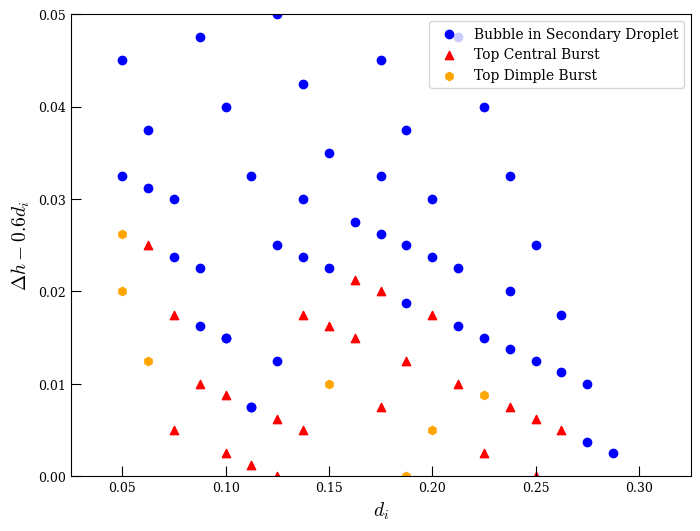

In [ ]:
#elongated 0.6 d h
import matplotlib.ticker as ticker

#Style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif', 'Times New Roman', 'Computer Modern Roman'] # Better font
plt.rcParams['mathtext.fontset'] = 'cm' # Use Computer Modern fonts for math
plt.rcParams['font.size'] = 10 # Adjust font size
plt.rcParams['axes.labelsize'] = 14  # Increased label size
plt.rcParams['axes.labelweight'] = 'bold' # Made labels bold
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

# Filter data for each phase
phase_0 = results[results[:, 2] == 0]
phase_1 = results[results[:, 2] == 1]
phase_2 = results[results[:, 2] == 2]
phase_neg1 = results[results[:, 2] == -1]
phase_neg2 = results[results[:, 2] == -2]

#0.006615696891759504

phase_neg3 = results[results[:, 2] == -3]
phase_neg4 = results[results[:, 2] == -4]
phase_neg5 = results[results[:, 2] == -5]
# Create the scatter plot
plt.figure(figsize=(8, 6))

# Plot data for each phase with different markers and colors
plt.scatter(phase_0[:, 0], phase_0[:, 1]-phase_0[:,0]*0.6, c='blue', marker='o', label='Bubble in Secondary Droplet')
plt.scatter(phase_1[:, 0], phase_1[:, 1]-phase_1[:,0]*0.6, c='red', marker='^', label='Top Central Burst')
plt.scatter(phase_2[:, 0], phase_2[:, 1]-phase_2[:,0]*0.6, c='orange', marker='h', label='Top Dimple Burst')

# Add labels and title
plt.xlabel('$d_i$')
plt.ylabel('$\Delta h - 0.6d_i $')
plt.tick_params(which='major', length=7, direction='in')
plt.tick_params(which='minor', length=4, direction='in')
plt.legend()
plt.grid(False)
plt.xlim(0.025, 0.325)  # Set x-axis limits with padding
plt.ylim(0., 0.05)  # Set y-axis limits with padding
plt.show()

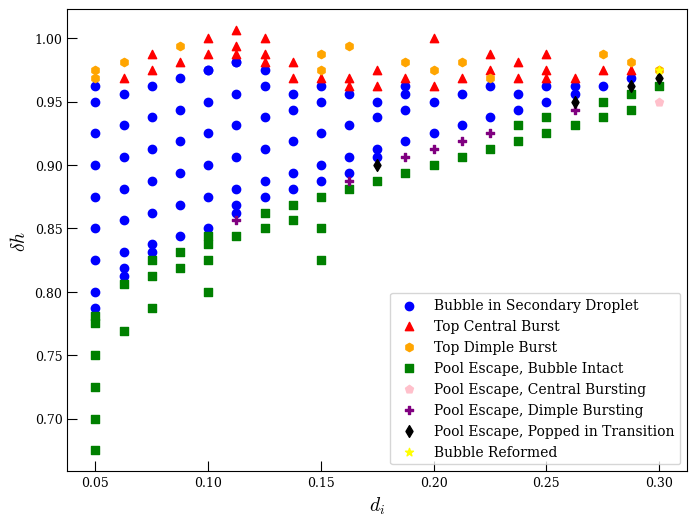

In [ ]:
#testing
import matplotlib.ticker as ticker

#Style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif', 'Times New Roman', 'Computer Modern Roman'] # Better font
plt.rcParams['mathtext.fontset'] = 'cm' # Use Computer Modern fonts for math
plt.rcParams['font.size'] = 10 # Adjust font size
plt.rcParams['axes.labelsize'] = 14  # Increased label size
plt.rcParams['axes.labelweight'] = 'bold' # Made labels bold
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

# Filter data for each phase
phase_0 = results[results[:, 2] == 0]
phase_1 = results[results[:, 2] == 1]
phase_2 = results[results[:, 2] == 2]
phase_neg1 = results[results[:, 2] == -1]
phase_neg2 = results[results[:, 2] == -2]
phase_neg3 = results[results[:, 2] == -3]
phase_neg4 = results[results[:, 2] == -4]
phase_neg5 = results[results[:, 2] == -5]
# Create the scatter plot
plt.figure(figsize=(8, 6))

# Plot data for each phase with different markers and colors
plt.scatter(phase_0[:,0], 1- phase_0[:, 1]+phase_0[:,0]*0.5, c='blue', marker='o', label='Bubble in Secondary Droplet')
plt.scatter(phase_1[:, 0], 1 - phase_1[:, 1] + phase_1[:, 0] * 0.5, c='red', marker='^', label='Top Central Burst')
plt.scatter(phase_2[:, 0], 1 - phase_2[:, 1] + phase_2[:, 0] * 0.5, c='orange', marker='h', label='Top Dimple Burst')
plt.scatter(phase_neg1[:, 0], 1 - phase_neg1[:, 1] + phase_neg1[:, 0] * 0.5, c='green', marker='s', label='Pool Escape, Bubble Intact')
plt.scatter(phase_neg2[:, 0], 1 - phase_neg2[:, 1] + phase_neg2[:, 0] * 0.5, c='pink', marker='p', label='Pool Escape, Central Bursting')
plt.scatter(phase_neg3[:, 0], 1 - phase_neg3[:, 1] + phase_neg3[:, 0] * 0.5, c='purple', marker='P', label='Pool Escape, Dimple Bursting')
plt.scatter(phase_neg4[:, 0], 1 - phase_neg4[:, 1] + phase_neg4[:, 0] * 0.5, c='black', marker='d', label='Pool Escape, Popped in Transition')
plt.scatter(phase_neg5[:, 0], 1 - phase_neg5[:, 1] + phase_neg5[:, 0] * 0.5, c='yellow', marker='*', label='Bubble Reformed')


# Add labels and title
plt.xlabel('$d_i$')
plt.ylabel('$\delta h $')
plt.tick_params(which='major', length=7, direction='in')
plt.tick_params(which='minor', length=4, direction='in')
plt.legend()
plt.grid(False)
#plt.xlim(0.025, 0.325)  # Set x-axis limits with padding
#plt.ylim(0., 0.05)  # Set y-axis limits with padding
plt.show()

In [ ]:
print(len(results))

185


In [ ]:
#eccentricity via bubble


import matplotlib.ticker as ticker

#Style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif', 'Times New Roman', 'Computer Modern Roman'] # Better font
plt.rcParams['mathtext.fontset'] = 'cm' # Use Computer Modern fonts for math
plt.rcParams['font.size'] = 10 # Adjust font size
plt.rcParams['axes.labelsize'] = 14  # Increased label size
plt.rcParams['axes.labelweight'] = 'bold' # Made labels bold
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

# Filter data for each phase
phase_0 = results[results[:, 2] == 0]
phase_1 = results[results[:, 2] == 1]
phase_2 = results[results[:, 2] == 2]
phase_neg1 = results[results[:, 2] == -1]
phase_neg2 = results[results[:, 2] == -2]
phase_neg3 = results[results[:, 2] == -3]
phase_neg4 = results[results[:, 2] == -4]
phase_neg5 = results[results[:, 2] == -5]
# Create the scatter plot
plt.figure(figsize=(8, 6))

# Plot data for each phase with different markers and colors
plt.scatter(phase_0[:, 0], (0.5 - phase_0[:, 1]), c='blue', marker='o', label='Bubble in Secondary Droplet')
plt.scatter(phase_1[:, 0], (0.5 - phase_1[:, 1]), c='red', marker='^', label='Top Central Burst')
plt.scatter(phase_2[:, 0], (0.5 - phase_2[:, 1]), c='orange', marker='h', label='Top Dimple Burst')
plt.scatter(phase_neg1[:, 0], (0.5 - phase_neg1[:, 1]), c='green', marker='s', label='Pool Escape, Bubble Intact')
plt.scatter(phase_neg2[:, 0], (0.5 - phase_neg2[:, 1]), c='pink', marker='p', label='Pool Escape, Central Bursting')
plt.scatter(phase_neg3[:, 0], (0.5 - phase_neg3[:, 1]), c='purple', marker='P', label='Pool Escape, Dimple Bursting')
plt.scatter(phase_neg4[:, 0], (0.5 - phase_neg4[:, 1]), c='black', marker='d', label='Pool Escape, Popped in Transition')
plt.scatter(phase_neg5[:, 0], (0.5 - phase_neg5[:, 1]), c='yellow', marker='*', label='Bubble Reformed')

# Add the line
d_i = np.linspace(0.025, 0.325, 100)  # Create a range of d_i values
y = 1/2-0.5*d_i
plt.plot(d_i, y, color='pink', linestyle='--', label='Geometric Bursting Limit')

# Add labels and title
plt.xlabel('$d_i$')
plt.ylabel('$c $')
plt.tick_params(which='major', length=7, direction='in')
plt.tick_params(which='minor', length=4, direction='in')
plt.legend()
plt.grid(False)
plt.xlim(0.025, 0.325)  # Set x-axis limits with padding
#plt.ylim(0.5, 1)  # Set y-axis limits with padding

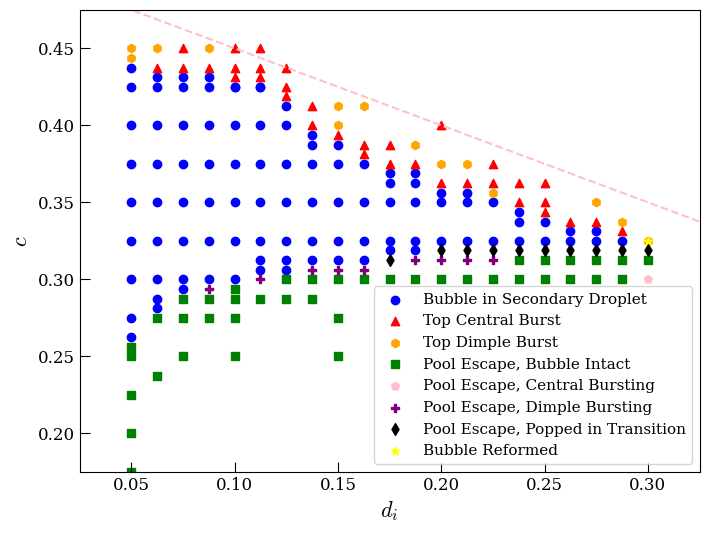

In [ ]:
#eccentricity via bubble


import matplotlib.ticker as ticker

#Style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif', 'Times New Roman', 'Computer Modern Roman'] # Better font
plt.rcParams['mathtext.fontset'] = 'cm' # Use Computer Modern fonts for math
plt.rcParams['font.size'] = 12 # Adjust font size
plt.rcParams['axes.labelsize'] = 16  # Increased label size
plt.rcParams['axes.labelweight'] = 'bold' # Made labels bold
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['figure.titlesize'] = 18

# Filter data for each phase
phase_0 = results[results[:, 2] == 0]
phase_1 = results[results[:, 2] == 1]
phase_2 = results[results[:, 2] == 2]
phase_neg1 = results[results[:, 2] == -1]
phase_neg2 = results[results[:, 2] == -2]
phase_neg3 = results[results[:, 2] == -3]
phase_neg4 = results[results[:, 2] == -4]
phase_neg5 = results[results[:, 2] == -5]
# Create the scatter plot
plt.figure(figsize=(8, 6))

# Plot data for each phase with different markers and colors
plt.scatter(phase_0[:, 0], (0.5 - phase_0[:, 1]), c='blue', marker='o', label='Bubble in Secondary Droplet')
plt.scatter(phase_1[:, 0], (0.5 - phase_1[:, 1]), c='red', marker='^', label='Top Central Burst')
plt.scatter(phase_2[:, 0], (0.5 - phase_2[:, 1]), c='orange', marker='h', label='Top Dimple Burst')
plt.scatter(phase_neg1[:, 0], (0.5 - phase_neg1[:, 1]), c='green', marker='s', label='Pool Escape, Bubble Intact')
plt.scatter(phase_neg2[:, 0], (0.5 - phase_neg2[:, 1]), c='pink', marker='p', label='Pool Escape, Central Bursting')
plt.scatter(phase_neg3[:, 0], (0.5 - phase_neg3[:, 1]), c='purple', marker='P', label='Pool Escape, Dimple Bursting')
plt.scatter(phase_neg4[:, 0], (0.5 - phase_neg4[:, 1]), c='black', marker='d', label='Pool Escape, Popped in Transition')
plt.scatter(phase_neg5[:, 0], (0.5 - phase_neg5[:, 1]), c='yellow', marker='*', label='Bubble Reformed')

# Add the line
d_i = np.linspace(0.025, 0.325, 100)  # Create a range of d_i values
y = 1/2-0.5*d_i
plt.plot(d_i, y, color='pink', linestyle='--')

# Add labels and title
plt.xlabel('$d_i$')
plt.ylabel('$c $')
plt.tick_params(which='major', length=7, direction='in')
plt.tick_params(which='minor', length=4, direction='in')
plt.legend()
plt.grid(False)
plt.xlim(0.025, 0.325)  # Set x-axis limits with padding
plt.ylim(0.20-0.025, 0.475)  # Set y-axis limits with padding
plt.savefig('di_c.pdf', format='pdf', dpi=1200)
plt.show()

<>:32: SyntaxWarning: invalid escape sequence '\D'
<>:32: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipython-input-4251038849.py:32: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta h $')


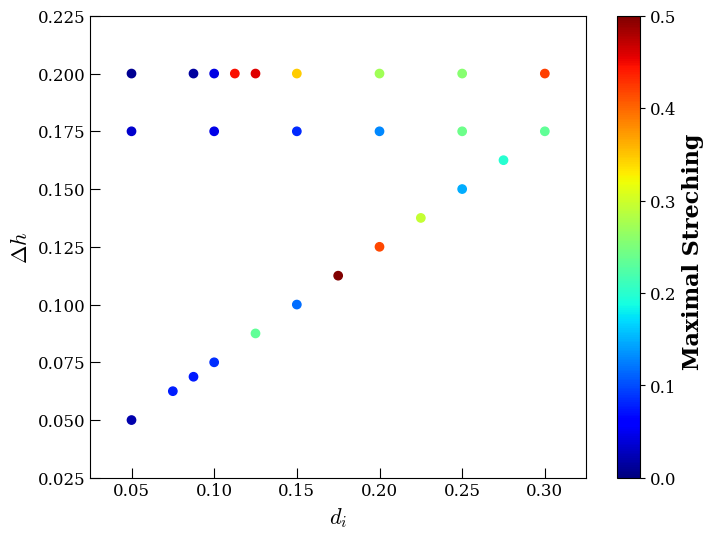

In [ ]:
# prompt: make a 2d phase diagram: x axis is results[:,0,], y - results[:,1], phase - the third element in each array of the results np array and give different shapes and colors for eah value - 0,1,-1


results = np.array([[0.05,0.175,0.0237/0.0229],[0.10,0.175,0.0495/0.0473],[0.15,0.175,0.0776/0.0717],[0.20,0.175,0.1114/0.0986],[0.25,0.175,0.1526/0.123],[0.05,0.20,0.0237/0.0235],[0.0875,0.20,0.406/0.400],[0.10,0.20,0.0479/0.0459],[0.1125,0.20,0.0528/0.0365],[0.125,0.20,0.0601/0.0412],[0.15,0.20,0.0723/0.0537],[0.20,0.20,0.0967/0.0760],[0.25,0.20,0.1236/0.0984],[0.30,0.20,0.1480/0.1042],[0.05,0.05,1.02],[0.075,0.075/2+0.025,0.0376/0.0349],[0.0875,0.0875/2+0.025,0.443/0.412],[0.10,0.075,0.0514/0.0474],[0.125,0.125/2+0.025,0.0739/0.0599],[0.15,0.15/2+0.025,0.0808/0.0724],[0.175,0.175/2+0.025,0.1296/0.0849],[0.20,0.10+0.025,0.1380/0.0974],[0.225,0.225/2+0.025,0.1423/0.1099],[0.25,0.25/2+0.025,0.1404/0.1224],[0.275,0.275/2+0.025,0.1617/0.1349],[0.30,0.15+0.025,0.1819/0.1474]])
import matplotlib.ticker as ticker

#Style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif', 'Times New Roman', 'Computer Modern Roman'] # Better font
plt.rcParams['mathtext.fontset'] = 'cm' # Use Computer Modern fonts for math
plt.rcParams['font.size'] = 12 # Adjust font size
plt.rcParams['axes.labelsize'] = 16  # Increased label size
plt.rcParams['axes.labelweight'] = 'bold' # Made labels bold
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 18


plt.figure(figsize=(8, 6))

# Use the third column of results for the color mapping
scatter = plt.scatter(results[:, 0], results[:, 1], c=results[:, 2]-1.0, cmap='jet', marker='o', clim=(0, 0.5))

# Add a colorbar to show the mapping
cbar = plt.colorbar(scatter)
cbar.set_label('Maximal Streching ')

# Add labels and title
plt.xlabel('$d_i$')
plt.ylabel('$\Delta h $')
plt.tick_params(which='major', length=7, direction='in')
plt.tick_params(which='minor', length=4, direction='in')
plt.grid(False)
plt.xlim(0.025, 0.325)  # Set x-axis limits with padding
plt.ylim(0.025, 0.225)  # Set y-axis limits with padding
plt.savefig('strecthing.pdf', format='pdf', dpi=1200)
plt.show()

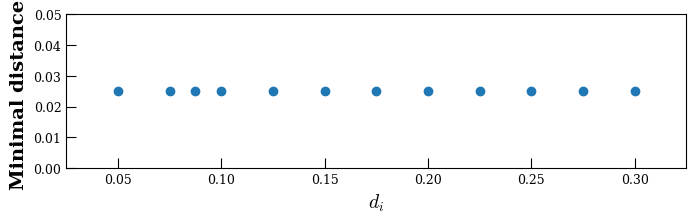

In [ ]:
# prompt: make a 2d phase diagram: x axis is results[:,0,], y - results[:,1], phase - the third element in each array of the results np array and give different shapes and colors for eah value - 0,1,-1


results = np.array([[0.05,0],[0.075,0.00],[0.0875,0.049],[0.10,0.024],[0.125,0.024],[0.15,0.15/2+0.025,0.0808/0.0724],[0.175,0.175/2+0.025,0.1296/0.0849],[0.20,0.10+0.025,0.1380/0.0974],[0.225,0.225/2+0.025,0.1423/0.1099],[0.25,0.25/2+0.025,0.1404/0.1224],[0.275,0.275/2+0.025,0.1617/0.1349],[0.30,0.15+0.025,0.1819/0.1474]])
import matplotlib.ticker as ticker

#Style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif', 'Times New Roman', 'Computer Modern Roman'] # Better font
plt.rcParams['mathtext.fontset'] = 'cm' # Use Computer Modern fonts for math
plt.rcParams['font.size'] = 10 # Adjust font size
plt.rcParams['axes.labelsize'] = 14  # Increased label size
plt.rcParams['axes.labelweight'] = 'bold' # Made labels bold
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

plt.figure(figsize=(8, 2))

# Use the third column of results for the color mapping
scatter = plt.scatter(results[:, 0], results[:, 1])


# Add labels and title
plt.xlabel('$d_i$')
plt.ylabel('Minimal distance ')
plt.tick_params(which='major', length=7, direction='in')
plt.tick_params(which='minor', length=4, direction='in')
plt.grid(False)
plt.xlim(0.025, 0.325)  # Set x-axis limits with padding
plt.ylim(0.0, 0.05)  # Set y-axis limits with padding
plt.show()